In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# L'algorithme de Metropolis-Hastings


On suppose que E est muni d'une structure de graphe : certains points x, y sont reliés par des arêtes, on note alors x ∼ y. On suppose que le graphe est connexe. Le principe de l'algorithme de Metropolis- Hastings est le suivant : on parcourt le graphe E en favorisant les arêtes qui font diminuer V , de temps en temps on s'autorise à augmenter V pour ne pas rester bloqué dans un minimum local.

Implémenter l'algorithme pour
  - E = {1,2,...,k}, avec k = 40,
  - Graphe : chaque i est relié à i−1 et i+1,
  - V (x) = cos(4πx/k) −  4πx/k,
  - différentes valeurs de β (on pourra prendre pour commencer T = 2000, β = 0.5 puis β = 2).

Tracer à chaque fois quelques trajectoires de t  → V (Xt) et comparer avec le graphe de la fonction V.

In [8]:
k = 40
E = [x for x in range(1,k+1)]

In [9]:
def V(x):
    return np.cos(4*np.pi*x / k) - np.sqrt(4*np.pi*x / k)

Remarques:
  - si beta = 0 alors une marche aleatoire uniform sur graphe
  - si beta = infini, marche bloque sur un min local

In [10]:
def simulate(beta, nb_iteration):
    x_current = np.random.randint(1, k+1)
    X_prochain = x_current
    v_current = V(x_current)
    trace = []
    for i in range(nb_iteration):
        if np.random.random() > 0.5:
            x_prochain = (x_current+1) % (k+1)
        else:
            x_prochain = (x_current-1) % (k+1)
        
        v = V(x_prochain)    
        if v < v_current:
            trace.append(v)
            v_current = v
            x_current = x_prochain
            
        else:
            prob = np.exp(-beta*(v- v_current))
            if np.random.random() > prob:
                
                trace.append(v_current)
            else:
                trace.append(v)
                v_current = v
                x_current = x_prochain
                
    print('simulation finish ...')
    plt.plot(trace)
    
    

simulation finish ...


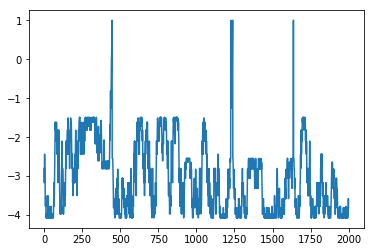

In [11]:
simulate(0.5, 2000)

simulation finish ...


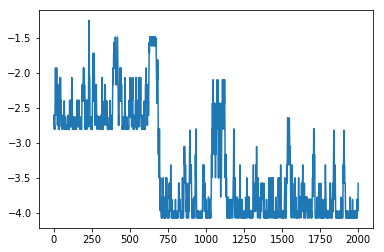

In [14]:
simulate(2, 2000)

simulation finish ...


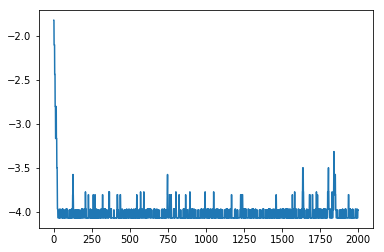

In [16]:
simulate(10, 2000)

In [17]:
valeus = [V(x) for x in E]

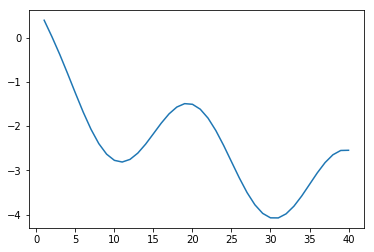

In [18]:
plt.plot(E, valeus)

# Voyageur de commerce

On cherche maintenant à appliquer l'algorithme de Metropolis-Hastings au problème suivant. Soient (X1, Y1), . (Xn, Yn) les coordonnées de n villes dans le plan. On cherche le chemin le plus court passant par toutes ces villes.
On met la structure suivante sur Sn : σ ∼ σ′ si l'on peut passer de σ à σ′ en permutant deux éléments. De façon générale, σ a toujours  n  permutations "voisines".

In [19]:
def EchangerDeuxVilles(Coordonnees, i, j):
    """
    permute deux indices i et j dans le tableau des villes
    """
    c = np.copy(Coordonnees)
    
    c[i] = Coordonnees[j]
    c[j] = Coordonnees[i]
    return c

In [20]:
def Longueur(Coordonnees):
    """
    calcule la longueur d'un chemin
    """
    l = 0
    for index in range(Coordonnees.shape[0]-1):
        
        dx = Coordonnees[index+1][0] - Coordonnees[index][0]
        dy = Coordonnees[index+1][1] - Coordonnees[index][1]
        l += np.sqrt(dx*dx + dy*dy)
        
    return l

In [21]:
import pandas as pd

#### Load data

In [22]:
data = pd.read_excel('PaysMystere.xls', header=None )

Coordonnees = data.values

In [23]:
def simulate_voyageurCommerce(beta, nb_iteration, coordonnees_init):
    
    x_current = coordonnees_init
    X_prochain = x_current
    v_current = Longueur(x_current)
    trace = []
    for i in range(nb_iteration):
        k = np.random.randint(0, coordonnees_init.shape[0])
        j = np.random.randint(0, coordonnees_init.shape[0])
        x_prochain = EchangerDeuxVilles(x_current, k, j)
        
        v = Longueur(x_prochain)    
        if v < v_current:
            trace.append(v)
            v_current = v
            x_current = x_prochain
            
        else:
            prob = np.exp(-beta*(v- v_current))
            if np.random.random() > prob:
                
                trace.append(v_current)
            else:
                trace.append(v)
                v_current = v
                x_current = x_prochain
                
    print('simulation finish ...')
    plt.plot(trace)
    print("Le chemin plus court: %.8f" % trace[-1])
    

simulation finish ...
Le chemin plus court: 1450.70762063


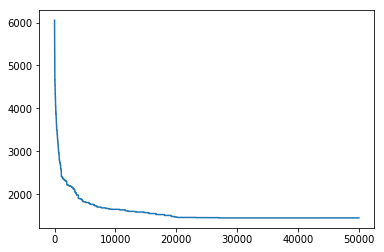

In [24]:
simulate_voyageurCommerce(2, 50000, Coordonnees)

Apres quelques fois essaies, on trouve que le plus court chemin ne diminue pas a partir de environs 1450..

En effet, la structure de graphe n'est pas bon, c'est-a-dire la permutation i,j n'evite pas la croisement sur 
le chemin. Un echange heuristique est au lieu d'echanger seulement i,j, on echange symetriquement tous les indices
comprise entre i et j 

In [25]:
def EchangerHeuristique(Coordonnees, i, j):
    mi = min(i,j)
    ma = max(i,j)
    c = np.copy(Coordonnees)
    for i in range(int((ma-mi)/2) +1):
        c[mi+i] = Coordonnees[ma-i]
        c[ma-i] = Coordonnees[mi+i]

    return c

In [26]:
def simulate_voyageurCommerce(beta, nb_iteration, coordonnees_init):
    
    x_current = coordonnees_init
    X_prochain = x_current
    v_current = Longueur(x_current)
    trace = []
    for i in range(nb_iteration):
        k = np.random.randint(0, coordonnees_init.shape[0])
        j = np.random.randint(0, coordonnees_init.shape[0])
        x_prochain = EchangerHeuristique(x_current, k, j)
        
        v = Longueur(x_prochain)    
        if v < v_current:
            trace.append(v)
            v_current = v
            x_current = x_prochain
            
        else:
            prob = np.exp(-beta*(v- v_current))
            if np.random.random() > prob:
                
                trace.append(v_current)
            else:
                trace.append(v)
                v_current = v
                x_current = x_prochain
                
    print('simulation finish ...')
    plt.plot(trace)
    print("Le chemin plus court: %.8f" % trace[-1])

simulation finish ...
Le chemin plus court: 976.95240285


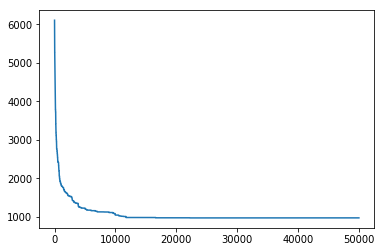

In [27]:
simulate_voyageurCommerce(2, 50000, Coordonnees)

#### Voici maintenant le plus court chemin diminue à 976.9524